## Overview

In the banking industry, it is important to predict and understand when customers might decide to end their relationship with the bank, known as customer churn. When customers leave, it can lead to financial losses and impact the bank's reputation.By identifying customers who are likely to churn, the bank can proactively take measures to retain them and minimize revenue loss.Therefore, the goal of this project is to develop a system that can accurately predict customer churn in order to take proactive steps to retain these customers.

In [138]:
#Import the necessary librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [139]:
# import the dataframe
df=pd.read_csv('C:\\Users\\USER\\Desktop\\tuetotal\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [140]:
#droping unnecessary columns
df=df.drop(['RowNumber','CustomerId'],axis=1)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
df.shape

(10000, 12)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [143]:
#some statistical info
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [144]:
#separing numerical features from categorical features
target_var=['Exited']
col_to_drop=['RowNumber','CustomerId']
num_val=[col for col in list(df.select_dtypes('number').columns) if col not in target_var+col_to_drop]
cat_feat=list(df.select_dtypes('object').columns)

## EDA

In [15]:
#Impact of having a credit card on customer churn
df.groupby('HasCrCard')['Exited'].mean()

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

In [7]:
#Impact of having being an active member on customer churn
df.groupby('IsActiveMember')['Exited'].mean()

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

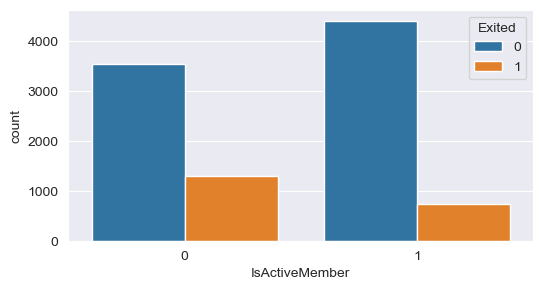

In [8]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,3))
sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=ax)
plt.show()

In [9]:
#Impact of Gender on customer churn
df.groupby('Gender',as_index=False)['Exited'].mean()

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


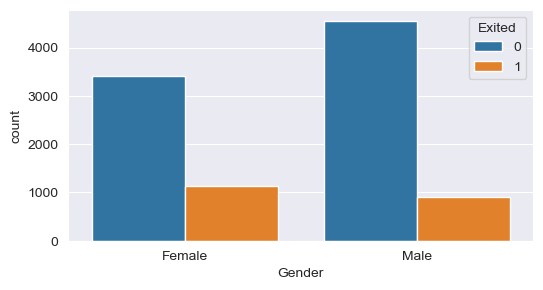

In [10]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,3))
sns.countplot(data=df,x='Gender',hue='Exited',ax=ax)
plt.show()

In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
#Impact of Geography on customer churn
df.groupby('Geography')['Exited'].mean()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

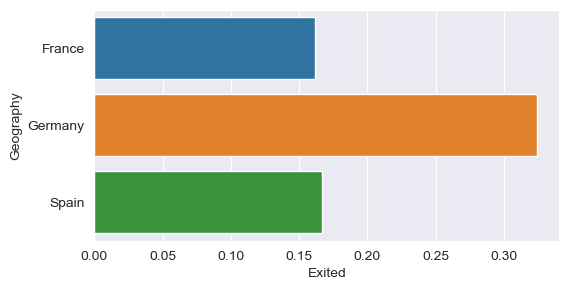

In [13]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,3))
sns.barplot(x=df.groupby('Geography')['Exited'].mean(),y=df.groupby('Geography')['Exited'].mean().index,ax=ax)
plt.show()

##### Looking for some relation between features and customer churn

In [14]:
#Looking for some relation between categorical features using Chi2 test
from scipy.stats import chi2_contingency
crs_card=pd.crosstab(df['HasCrCard'],df['Exited'])
chi2,p,dof=chi2_contingency(crs_card)[:3]
pd.DataFrame({'chi2_val':[chi2],'p_value':[p],'degree_of_freedom':[dof]})

,chi2_val,p_value,degree_of_freedom
0,0.471338,0.492372,1


Based on the P-value and as seen before there's no impact on having a Crcard on customer churn.

In [17]:
#relation between IsActiveMember and customer churn
crs_activmember=pd.crosstab(df['IsActiveMember'],df['Exited'])
chi2,p,dof=chi2_contingency(crs_activmember)[:3]
pd.DataFrame({'chi2_val':[chi2],'p_value':[p],'degree_of_freedom':[dof]})

,chi2_val,p_value,degree_of_freedom
0,242.985342,8.785858e-55,1


As our P-value is less than 0.05 there's a relation between IsActiveMember and customer churn.

In [18]:
#relation between Gender and customer churn
crs_gender=pd.crosstab(df['Gender'],df['Exited'])
chi2,p,dof=chi2_contingency(crs_gender)[:3]
pd.DataFrame({'chi2_val':[chi2],'p_value':[p],'degree_of_freedom':[dof]})

,chi2_val,p_value,degree_of_freedom
0,112.918571,2.248210e-26,1


As our P-value is less than 0.05 there's a relation between Gender and customer churn.

In [19]:
#relation between Geography and customer churn
crs_geo=pd.crosstab(df['Geography'],df['Exited'])
chi2,p,dof=chi2_contingency(crs_geo)[:3]
pd.DataFrame({'chi2_val':[chi2],'p_value':[p],'degree_of_freedom':[dof]})

,chi2_val,p_value,degree_of_freedom
0,301.255337,3.830318e-66,2


As our P-value is less than 0.05 there's a relation between Geography and customer churn.

In [159]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


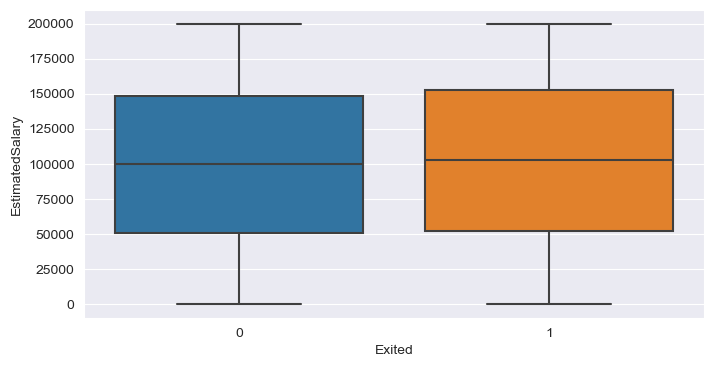

In [20]:
# relation between Estimated Salary and customer churn
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(data=df,x='Exited',y='EstimatedSalary',ax=ax)
plt.show()

There's no difference on the estimated Salary between the customers who churned or not.

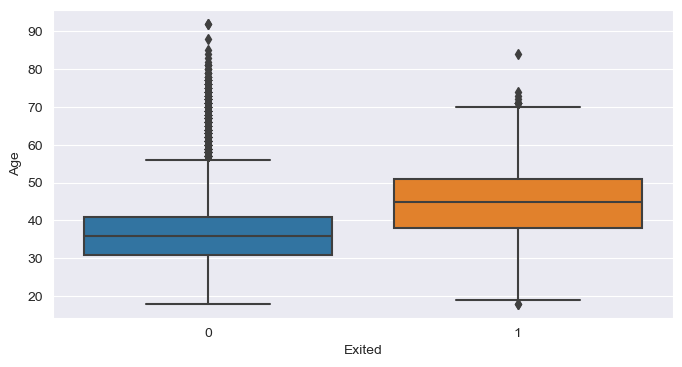

In [21]:
# relation between Age and customer churn
fig,ax=plt.subplots(figsize=(8,4))
sns.boxplot(data=df,x='Exited',y='Age',ax=ax)
plt.show()

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As we can see we are dealing with imbalanced dataset.

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
#preparing our datset
x=df.drop(['Surname','Exited'],axis=1)
y=df['Exited']

In [47]:
#splitting our datasets to train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape,x_test.shape

((7000, 10), (3000, 10))

In [48]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9136,595,France,Male,20,4,95830.43,1,1,0,177738.98
6410,689,Spain,Female,63,1,0.00,2,1,1,186526.12
2607,814,France,Male,31,1,118870.92,1,1,0,101704.19
3201,722,France,Male,20,6,0.00,2,1,0,195486.28
3330,738,France,Male,18,4,0.00,2,1,1,47799.15


In [49]:
#doing label endcoder for Gender variable
le=LabelEncoder()
x_train['Gender']=le.fit_transform(x_train['Gender'])
x_test['Gender']=le.transform(x_test['Gender'])

In [50]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9136,595,France,1,20,4,95830.43,1,1,0,177738.98
6410,689,Spain,0,63,1,0.00,2,1,1,186526.12
2607,814,France,1,31,1,118870.92,1,1,0,101704.19
3201,722,France,1,20,6,0.00,2,1,0,195486.28
3330,738,France,1,18,4,0.00,2,1,1,47799.15


In [51]:
#doing one hot encoding for Geography with two different methods
#first method with the pd.get_dummies method
pd.get_dummies(data=df,columns=['Geography'])

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [52]:
#As we are going to use pipelines, it's better to use one hot encoding
ohe=OneHotEncoder(sparse=False)
ohe.fit_transform(x_train[['Geography']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [53]:
ohe.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [54]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [55]:
a=pd.DataFrame(ohe.fit_transform(x_train[['Geography']]),columns=ohe.get_feature_names_out())
a.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [56]:
x_train=x_train.reset_index(drop=True)
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,595,France,1,20,4,95830.43,1,1,0,177738.98
1,689,Spain,0,63,1,0.00,2,1,1,186526.12
2,814,France,1,31,1,118870.92,1,1,0,101704.19
3,722,France,1,20,6,0.00,2,1,0,195486.28
4,738,France,1,18,4,0.00,2,1,1,47799.15


In [57]:
x_train=pd.concat([x_train,a],axis=1)
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,595,France,1,20,4,95830.43,1,1,0,177738.98,1.0,0.0,0.0
1,689,Spain,0,63,1,0.00,2,1,1,186526.12,0.0,0.0,1.0
2,814,France,1,31,1,118870.92,1,1,0,101704.19,1.0,0.0,0.0
3,722,France,1,20,6,0.00,2,1,0,195486.28,1.0,0.0,0.0
4,738,France,1,18,4,0.00,2,1,1,47799.15,1.0,0.0,0.0


In [58]:
#encoding our test set
ohe.transform(x_test[['Geography']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [59]:
b=pd.DataFrame(ohe.transform(x_test[['Geography']]),columns=ohe.get_feature_names_out())
b.head()

,Geography_France,Geography_Germany,Geography_Spain
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [60]:
x_test=x_test.reset_index(drop=True)
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,790,Spain,1,37,6,0.00,2,1,1,119484.01
1,521,France,1,35,6,96423.84,1,1,0,10488.44
2,712,France,0,37,1,106881.50,2,0,0,169386.81
3,729,Spain,0,38,10,0.00,2,1,0,189727.12
4,695,Germany,1,52,8,103023.26,1,1,1,22485.64


In [61]:
x_test=pd.concat([x_test,b],axis=1)
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,790,Spain,1,37,6,0.00,2,1,1,119484.01,0.0,0.0,1.0
1,521,France,1,35,6,96423.84,1,1,0,10488.44,1.0,0.0,0.0
2,712,France,0,37,1,106881.50,2,0,0,169386.81,1.0,0.0,0.0
3,729,Spain,0,38,10,0.00,2,1,0,189727.12,0.0,0.0,1.0
4,695,Germany,1,52,8,103023.26,1,1,1,22485.64,0.0,1.0,0.0


In [62]:
#After doing one hot encoding we will drop the geography variable
x_train=x_train.drop('Geography',axis=1)
x_test=x_test.drop('Geography',axis=1)

In [63]:
x_train.shape,x_test.shape

((7000, 12), (3000, 12))

In [64]:
#As we are focusing on models interpretability, we must have all our features on the same scale,to get a clear idea on their impact
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
#Getting our numerical values to scale
cat_var=['Gender','HasCrCard','IsActiveMember','Geography_France','Geography_Germany','Geography_Spain']
num_val=[col for col in x_train.columns if col not in cat_var]
num_val

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [66]:
#scaling our numerical features
for col in num_val:
    x_train[col]=scaler.fit_transform(x_train[col].values.reshape(-1,1))
    x_test[col]=scaler.transform(x_test[col].values.reshape(-1,1))

In [67]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.575582,1,-1.796679,-0.349474,0.312906,-0.912483,1,0,1.362512,1.0,0.0,0.0
1,0.398182,0,2.269825,-1.386929,-1.223574,0.799493,1,1,1.515472,0.0,0.0,1.0
2,1.693082,1,-0.756410,-1.386929,0.682321,-0.912483,1,0,0.038955,1.0,0.0,0.0
3,0.740036,1,-1.796679,0.342162,-1.223574,0.799493,1,0,1.671444,1.0,0.0,0.0
4,0.905783,1,-1.985818,-0.349474,-1.223574,0.799493,1,1,-0.899384,1.0,0.0,0.0


In [68]:
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1.444462,1,-0.188991,0.342162,-1.223574,0.799493,1,1,0.348453,0.0,0.0,1.0
1,-1.342163,1,-0.378131,0.342162,0.322420,-0.912483,1,0,-1.548861,1.0,0.0,0.0
2,0.636444,0,-0.188991,-1.386929,0.490091,0.799493,0,0,1.217124,1.0,0.0,0.0
3,0.812550,0,-0.094421,1.725435,-1.223574,0.799493,1,0,1.571193,0.0,0.0,1.0
4,0.460338,1,1.229557,1.033799,0.428231,-0.912483,1,1,-1.340022,0.0,1.0,0.0


Before creating any pipeline we will see the impact of an imbalanced dataset on our key metrics as precision and recall,and we 
will use some techniques to deal with this problem as SMOTHE OR Class Weighting, for that we will use Logistic regression as a 
base model.

In [69]:
#let's use some feature selection methods to see if it's confirming our conclusing during our EDA and Chi2 test
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [70]:
rfe=RFE(LogisticRegression(),n_features_to_select=5)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [71]:
rfe.support_

array([False,  True,  True, False, False, False, False,  True, False,
        True,  True, False])

In [72]:
rfe.ranking_

array([4, 1, 1, 8, 3, 7, 6, 1, 5, 1, 1, 2])

In [171]:
[b for a,b in zip(rfe.support_,x_train.columns) if a]

['Gender', 'Age', 'IsActiveMember', 'Geography_France', 'Geography_Germany']

As we can see RFE prove our conclusions as it shows that Gender,Age,IsActiveMember,Geography_France,Geography_Germany are our 

top 5 features to select for our base model.

In [74]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix

In [75]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)

In [76]:
print(classification_report(y_test,pred))
print()
print('roc score :{}'.format(roc_auc_score(y_test,pred)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000


roc score :0.5835491912947984


As we can see,we have a low value of recall,so will try  different approaches to deal with this issue

In [77]:
#target value_counts before balancing
y_train.value_counts()

0    5574
1    1426
Name: Exited, dtype: int64

### First approach:SMOTE

In [78]:
## let's use SMOTE
from imblearn.over_sampling import SMOTE
smote_sampler=SMOTE(random_state=42)
x_s,y_s=smote_sampler.fit_resample(x_train,y_train)

In [79]:
y_s.value_counts()

0    5574
1    5574
Name: Exited, dtype: int64

In [80]:
model2=LogisticRegression()
model2.fit(x_s,y_s)
pred_s=model2.predict(x_test)

In [81]:
print(classification_report(y_test,pred_s))
print()
print('roc score :{}'.format(roc_auc_score(y_test,pred_s)))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2389
           1       0.40      0.68      0.50       611

    accuracy                           0.73      3000
   macro avg       0.65      0.71      0.66      3000
weighted avg       0.80      0.73      0.75      3000


roc score :0.7086088790754679


SMOTE can improve recall by increasing the ability of the model to capture minority class instances, but it may lead to a 
decrease in precision due to the introduction of noise or uncertainty associated with the synthetic examples.

we have seen also a sigmificant increase for roc score from 0.58 to 0.70

### Second approach:Class Weighting

In [82]:
#Class Weighting
class_weight={}
class_weight[0]=0.2
class_weight[1]=0.8

In [83]:
model3=LogisticRegression(class_weight=class_weight)
model3.fit(x_train,y_train)
pred_3=model3.predict(x_test)

In [84]:
print(classification_report(y_test,pred_3))
print()
print('roc score :{}'.format(roc_auc_score(y_test,pred_3)))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2389
           1       0.39      0.74      0.51       611

    accuracy                           0.72      3000
   macro avg       0.65      0.72      0.66      3000
weighted avg       0.81      0.72      0.74      3000


roc score :0.7242366301084007


Class Weighting has a great result as it has higher recall,f1 score and roc score compared to SMOTE approach.

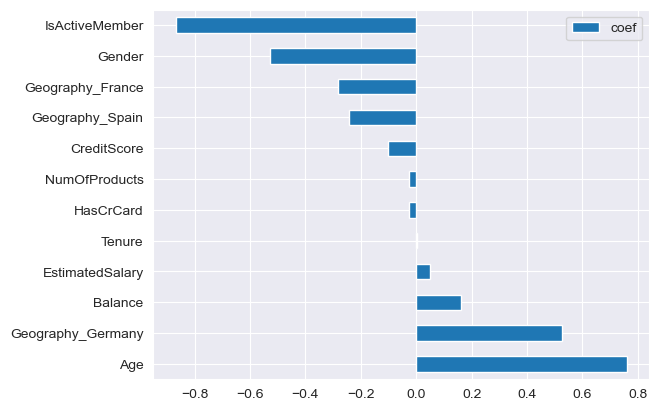

In [85]:
#let's analyse features attribution to that model(after class Weighting)
feat_attr=pd.DataFrame(data=model3.coef_.reshape(-1,1),index=x_train.columns).rename(columns={0:'coef'})
feat_attr.sort_values('coef',ascending=False).plot(kind='barh')
plt.show()

IsActiveMember has a negative coefficient wich indicates that being an active member decrease the chance of exiting by 58%(1-exp(-0.86)).

Males have lower chances of exiting by 41% (1-exp(-0.52)).

As long as the age increases we have higher chances of exiting as it's already shown on our EDA.

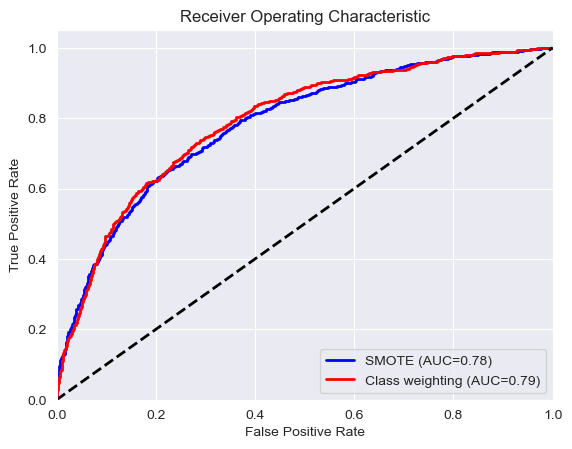

In [112]:
from sklearn.metrics import roc_curve,auc

# Calculate ROC curve and AUC for SMOTE technique
fpr1, tpr1, _ = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
roc_auc1 = auc(fpr1, tpr1)

# Calculate ROC curve and AUC for Model 2
fpr2, tpr2, _ = roc_curve(y_test, model3.predict_proba(x_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='SMOTE (AUC={:0.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='red', lw=2, label='Class weighting (AUC={:0.2f})' .format(roc_auc2))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Create a ML pipeline

For now we will introduce some new boosting algorithms as Xgboost.

we will try to organize our machine learning workflow by using Pipelines in order to link different step together and make the
process faster.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline=Pipeline([('model',None)])

In [126]:
param_grid=[
    {
    'model':[LogisticRegression()],
    'model__class_weight':[{0:0.2,1:0.8},{0:0.3,1:0.7}]
    },
    
    {
        'model':[DecisionTreeClassifier()],
        'model__max_depth':[1,10,20,30,40,50,100],
        'model__class_weight':[{0:0.2,1:0.8},{0:0.3,1:0.7}]
        
    },
    {
        'model':[RandomForestClassifier()],
        'model__max_depth':[1,10,20,30,40,50,100],
        'model__n_estimators':[1,10,20,40,50,100,150,120],
        'model__class_weight':[{0:0.2,1:0.8},{0:0.3,1:0.7}]
    },
    {
        'model':[XGBClassifier()],
        'model__n_estimators':[50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 1.0],
        'model__max_depth':[3, 5, 7],
        'model__scale_pos_weight':[2,3,4]
        
}
]

In [127]:
from sklearn.metrics import make_scorer,f1_score
scoring = make_scorer(f1_score)

In [128]:
grid_comp=GridSearchCV(pipeline,param_grid,cv=5,scoring=scoring)
grid_comp.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [LogisticRegression()],
                          'model__class_weight': [{0: 0.2, 1: 0.8},
                                                  {0: 0.3, 1: 0.7}]},
                         {'model': [DecisionTreeClassifier()],
                          'model__class_weight': [{0: 0.2, 1: 0.8},
                                                  {0: 0.3, 1: 0.7}],
                          'model__max_depth': [1, 10, 20, 30, 40, 50, 100]},
                         {'model': [RandomForestClassifier()],
                          'model__class_weight': [{0...
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monoto

In [130]:
final_model=grid_comp.best_estimator_

In [131]:
grid_comp.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=150, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 150,
 'model__scale_pos_weight': 2}

In [132]:
pred=final_model.predict(x_test)

In [133]:
print(classification_report(y_test,pred))
print()
print('roc score :{}'.format(roc_auc_score(y_test,pred)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2389
           1       0.67      0.63      0.65       611

    accuracy                           0.86      3000
   macro avg       0.79      0.77      0.78      3000
weighted avg       0.86      0.86      0.86      3000


roc score :0.7746826528298345


At this step of our analysis we try to focus on f1 score as a reasonable choice for handling class imbalance and finding some real balance  between precision and recall, so for that we did a comparaison between different algorithoms including :
Logistic regression,Decison trees,Random forest and Xgboost classifiers.